In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 
import keras
from keras import layers
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Reshape
from keras.models import Sequential
import matplotlib.pyplot as plt

In [4]:
numcoding={
    "female":0,
    "male":1
}

In [5]:
x_test=[]
y_test=[]
x_train=[]
y_train=[]
test_path="../input/gender-classification-dataset/Validation"
train_path="../input/gender-classification-dataset/Training"
catogries=os.listdir("../input/gender-classification-dataset/Training")
for cats in catogries:
    for image in os.listdir(os.path.join(test_path,cats)):
        im=cv2.imread(os.path.join(test_path,cats,image))
        im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im=cv2.resize(im,(30,30))
        x_test.append(im)
        y_test.append(numcoding[cats])
        
for cats in catogries:
    for img in os.listdir(os.path.join(test_path,cats)):
        ims=cv2.imread(os.path.join(test_path,cats,img))
        ims=cv2.cvtColor(ims,cv2.COLOR_BGR2GRAY)
        ims=cv2.resize(ims,(30,30))
        x_train.append(ims)
        y_train.append(numcoding[cats])

In [6]:
x_test=np.array(x_test)
x_train=np.array(x_train)
y_test=np.array(y_test)
y_train=np.array(y_train)

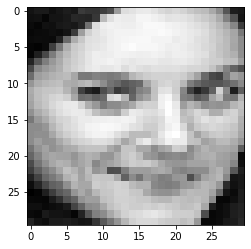

In [7]:
plt.imshow(x_test[0],cmap="gray")
plt.show()

In [8]:
x_test=x_test.reshape(x_test.shape[0],30,30,1)
x_train=x_train.reshape(x_train.shape[0],30,30,1)

In [9]:
x_test=x_test.astype('float32')
x_train=x_train.astype('float32')
x_test=(x_test/255)
x_train=(x_train/255)

In [10]:
model=Sequential()
model.add(Conv2D(filters=10,kernel_size=2,strides=(1,1),input_shape=(30,30,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.5))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.3))
model.add(Conv2D(filters=8,kernel_size=2,strides=(1,1),padding="valid",activation="relu"))
model.add(layers.AveragePooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.2))
model.add(Flatten())
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 10)        50        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 10)        40        
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 10)          4

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
365/365 [==============================] - 8s 3ms/step - loss: 0.8560 - accuracy: 0.5633
Epoch 2/20
365/365 [==============================] - 1s 3ms/step - loss: 0.5846 - accuracy: 0.6918
Epoch 3/20
365/365 [==============================] - 1s 4ms/step - loss: 0.5204 - accuracy: 0.7517
Epoch 4/20
365/365 [==============================] - 1s 3ms/step - loss: 0.4931 - accuracy: 0.7628
Epoch 5/20
365/365 [==============================] - 1s 3ms/step - loss: 0.4605 - accuracy: 0.7924
Epoch 6/20
365/365 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.7994
Epoch 7/20
365/365 [==============================] - 1s 3ms/step - loss: 0.4307 - accuracy: 0.8052
Epoch 8/20
365/365 [==============================] - 1s 3ms/step - loss: 0.4054 - accuracy: 0.8207
Epoch 9/20
365/365 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8218
Epoch 10/20
365/365 [==============================] - 1s 3ms/step - loss: 0.3895 - accuracy: 0.8302

In [12]:
score=model.evaluate(x_test,y_test)
print(score)

365/365 [==============================] - 1s 2ms/step - loss: 0.2306 - accuracy: 0.9119
[0.23062348365783691, 0.9119237661361694]
